In [4]:
import requests
import time
import pandas as pd
import datetime
from datetime import datetime, timezone


In [5]:
base_url = "http://localhost:8000" 

In [3]:
def post_tweet_for_prediction(tweet, user):
    response = requests.post(f'{base_url}/predict', json={"text": tweet, "user": user})
    return response.json()

## user posting tweet

In [4]:
def store_posted_tweet(tweet_id, retweet_id, user_id, text, likes, retweets, safety_status, created_at):
    data = {
        "tweet_id": tweet_id,
        "retweet_id": retweet_id,
        "user_id": user_id,
        "text": text,
        "likes": likes,
        "retweets": retweets,
        "safety_status": safety_status,
        "created_at": created_at
    }
    response = requests.post(f'{base_url}/store_tweet', json=data)
    return response.json()

In [180]:
def simulate_user_submission():
    tweets = [
        # {"text": "This is a tweet for testing purposes.", "user": "user6"},
        {"text": "nd hate is all i know", "user": "user6"},
        # {"text": "And yet another example of a tweet.", "user": "user3"}
    ]

    for tweet in tweets:
        prediction = post_tweet_for_prediction(tweet["text"], tweet["user"])
        print("Prediction Result:", prediction)
        
        if prediction["logreg_result"] != 1:
            created_at = datetime.now(timezone.utc).isoformat()  # Convert datetime to ISO format string

            store_response = store_posted_tweet(
                tweet_id=prediction["tweet_id"],
                retweet_id=None,
                user_id=tweet["user"],
                text=prediction["tweet"],
                likes=prediction["likes"],
                retweets=prediction["retweets"],
                safety_status=None,  # Initial safety status is None
                created_at=created_at
            )
            print("Store Tweet Response:", store_response)

In [181]:
simulate_user_submission()

Prediction Result: {'tweet_id': 'a1bca3865279588a1b3632d0d7def22b552b91274310e6a16ed4ec60352f81f3', 'tweet': 'nd hate is all i know', 'user': 'user6', 'likes': 0, 'retweets': 0, 'logreg_prob': 0.16710891406820716, 'logreg_result': 0, 'cnn_prob': None, 'cnn_result': None, 'created_at': '2024-07-25T18:51:29.418932'}
Store Tweet Response: {'retweet_id': None, 'text': 'nd hate is all i know', 'tweet_id': 'a1bca3865279588a1b3632d0d7def22b552b91274310e6a16ed4ec60352f81f3', 'retweets': 0, 'created_at': '2024-07-25T18:51:29.418932', 'user_id': 'user6', 'id': 18, 'likes': 0, 'safety_status': None}


In [182]:
# time.sleep(40)  # Wait to ensure the scheduler runs at least once

## admin viewing tweets

In [2]:
# Function to fetch all tweets
def fetch_all_tweets():
    response = requests.get(f'{base_url}/fetch_tweets')
    return response.json()

In [6]:
# Fetch and display tweets after batch prediction
tweets_for_admin_view = fetch_all_tweets()

before scheduled prediction:

In [185]:
for i in range(len(tweets_for_admin_view)):
    print(tweets_for_admin_view[i])

{'tweet_id': '0a16bf59c8b68a488c9d3a950f84fb807c9d18fad89d22ba5d1c76e36f482a3e', 'retweet_id': None, 'tweet': 'i wish fucking towel heads never came to our country in the first place', 'user': 'user5', 'likes': 0, 'retweets': 0, 'logreg_prob': 0.9446891508111326, 'logreg_result': 1, 'cnn_prob': 0.9569458961486816, 'cnn_result': 1, 'admin_result': None, 'created_at': '2024-07-25T18:35:30.508421'}
{'tweet_id': '78657f33cbaf967ccd9c2ac01a246815eb2b03df9c5bccfdf31aded91415e23c', 'retweet_id': None, 'tweet': 'i look forward to the happy things chat and just to lead up to it here is a smiling crater you need to look at the large image to see it', 'user': 'user3', 'likes': 0, 'retweets': 0, 'logreg_prob': 0.030545622771433276, 'logreg_result': 0, 'cnn_prob': 0.04232430085539818, 'cnn_result': 0, 'admin_result': None, 'created_at': '2024-07-25T18:35:41.609806'}
{'tweet_id': '6e693849939bd86cfabdef78104d7dd2987e0b2576ee27415667ea84d91a38c9', 'retweet_id': None, 'tweet': 'andreas i am not ignori

after scheduled prediction:

In [ ]:
# Fetch and display tweets after batch prediction
tweets_for_admin_view_after = fetch_all_tweets()

In [157]:
for i in range(len(tweets_for_admin_view_after)):
    print(tweets_for_admin_view_after[i])

{'tweet_id': '0a16bf59c8b68a488c9d3a950f84fb807c9d18fad89d22ba5d1c76e36f482a3e', 'retweet_id': None, 'tweet': 'i wish fucking towel heads never came to our country in the first place', 'user': 'user5', 'likes': 0, 'retweets': 0, 'logreg_prob': 0.9446891508111326, 'logreg_result': 1, 'cnn_prob': 0.9569458961486816, 'cnn_result': 1, 'admin_result': None, 'created_at': '2024-07-25T18:35:30.508421'}
{'tweet_id': '78657f33cbaf967ccd9c2ac01a246815eb2b03df9c5bccfdf31aded91415e23c', 'retweet_id': None, 'tweet': 'i look forward to the happy things chat and just to lead up to it here is a smiling crater you need to look at the large image to see it', 'user': 'user3', 'likes': 0, 'retweets': 0, 'logreg_prob': 0.030545622771433276, 'logreg_result': 0, 'cnn_prob': 0.04232430085539818, 'cnn_result': 0, 'admin_result': None, 'created_at': '2024-07-25T18:35:41.609806'}
{'tweet_id': '6e693849939bd86cfabdef78104d7dd2987e0b2576ee27415667ea84d91a38c9', 'retweet_id': None, 'tweet': 'andreas i am not ignori

In [156]:
print(len(tweets_for_admin_view_after))

9


In [54]:
# Print tweets where logreg_result does not match cnn_result
for tweet in tweets_for_admin_view_after:
    if tweet['logreg_result'] != tweet['cnn_result']:
        print(f"Discrepancy found for tweet_id {tweet['tweet_id']}:")
        print(f"  Logistic Regression Result: {tweet['logreg_result']}")
        print(f"  CNN Result: {tweet['cnn_result']}")
        print(f"  Tweet: {tweet['tweet']}\n")

Discrepancy found for tweet_id bec72faf:
  Logistic Regression Result: 1
  CNN Result: 0
  Tweet: molag bad and his cedric puppets are dead



## user reporting tweets

In [165]:
import requests

# Example tweet ID to report and the safety status (e.g., 1 for hate speech)
report_data = {
    "tweet_id": "b006e7c52e3014990b8885234a5bd4f6d5ef5e2e3932d3caba605ea4a0c616f1",
    'user_id': "user1",
    "safety_status": 1,  
    "reported_at": datetime.now(timezone.utc).isoformat()
}

# Function to report a tweet
def report_tweet(report_data):
    url = f"{base_url}/report_tweet"
    response = requests.post(url, json=report_data)
    
    if response.status_code == 200:
        print("Report submitted successfully.")
    else:
        print(f"Failed to submit report: {response.status_code}")
        print(f"Response: {response.json()}")




In [166]:
# Run the simulation 
report_tweet(report_data)

Failed to submit report: 404
Response: {'detail': 'Tweet not found'}


## admin view reported tweets

In [167]:
# Function to fetch all reported tweets
def fetch_reported_tweets():
    url = f'{base_url}/reported_tweets'
    response = requests.get(url)
    return response.json()

# Fetch all reported tweets
reported_tweets = fetch_reported_tweets()

In [168]:
for i in range(len(reported_tweets)):
    print(reported_tweets[i])

{'tweet_id': '78657f33cbaf967ccd9c2ac01a246815eb2b03df9c5bccfdf31aded91415e23c', 'user_id': 'user3', 'id': 1, 'reported_at': '2024-07-25T18:37:46.353992'}
{'tweet_id': '0a16bf59c8b68a488c9d3a950f84fb807c9d18fad89d22ba5d1c76e36f482a3e', 'user_id': 'user1', 'id': 2, 'reported_at': '2024-07-25T18:38:10.024230'}
{'tweet_id': 'b006e7c52e3014990b8885234a5bd4f6d5ef5e2e3932d3caba605ea4a0c616f1', 'user_id': 'user1', 'id': 3, 'reported_at': '2024-07-25T18:38:27.547587'}


## admin mark tweets unsafe

In [172]:
# Example data to mark a tweet as unsafe
update_data = {
    "tweet_id": "b006e7c52e3014990b8885234a5bd4f6d5ef5e2e3932d3caba605ea4a0c616f1",
    "new_safety_status": 1,  # Assume 1 indicates hate speech
    "change_source": "admin",  # Indicates the change is made by an admin
    "changed_at": datetime.now(timezone.utc).isoformat()
}

In [173]:
# Function to update the safety status of a tweet
def update_safety_status(data):
    url = f"{base_url}/update_safety_status"
    response = requests.post(url, json=data)
    
    if response.status_code == 200:
        print("Safety status updated successfully.")
    else:
        print(f"Failed to update safety status: {response.status_code}")
        print(f"Response: {response.json()}")


In [174]:
# Simulate admin marking a tweet as unsafe
update_safety_status(update_data)

Safety status updated successfully.


## user display posted tweets

In [101]:
# Function to fetch all stored tweets for user view
def fetch_user_view_tweets():
    url = f"{base_url}/display_tweets"
    response = requests.get(url)
    
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to fetch tweets: {response.status_code}")
        print(f"Response: {response.json()}")
        return None

In [102]:
# Fetch and display all user view tweets
user_view_tweets = fetch_user_view_tweets()

In [103]:
print(user_view_tweets)

[{'id': 1, 'user_id': 'user3', 'likes': 0, 'safety_status': 1, 'text': 'the money', 'tweet_id': '7ab4179f', 'retweet_id': None, 'retweets': 0, 'created_at': '2024-07-25T08:50:43.998954'}, {'id': 2, 'user_id': 'user3', 'likes': 0, 'safety_status': 1, 'text': 'the main movement is...', 'tweet_id': '81de6805', 'retweet_id': None, 'retweets': 0, 'created_at': '2024-07-25T08:52:48.634960'}, {'id': 3, 'user_id': 'user7', 'likes': 0, 'safety_status': None, 'text': 'renewed revert wars hey byway welcome back but when i said to return after waiting out your block i did not mean for you to return and re start the revert warring exactly where you left it let me make it clear that this will still be seen as disruption and i very strongly advise you not to even approach by wide margin this time admins can block for disruption in repeat cases even without being touched technically', 'tweet_id': '2e0e1ca6', 'retweet_id': None, 'retweets': 0, 'created_at': '2024-07-25T08:53:15.898956'}, {'id': 4, 'use

In [67]:
if user_view_tweets:
    count = 0
    for tweet in user_view_tweets:
        print(f"Tweet ID: {tweet['tweet_id']}")
        print(f"Retweet ID: {tweet.get('retweet_id', 'N/A')}")
        print(f"User ID: {tweet['user_id']}")
        print(f"Text: {tweet['text']}")
        print(f"Likes: {tweet['likes']}")
        print(f"Retweets: {tweet['retweets']}")
        print(f"Safety Status: {tweet.get('safety_status', 'N/A')}")
        print(f"Posted at: {tweet.get('created_at', 'N/A')}")
        print("-" * 40)
        count+=1
    print(count)
else:
    print("No tweets found.")

Tweet ID: 7ab4179f
Retweet ID: None
User ID: user3
Text: the money
Likes: 0
Retweets: 0
Safety Status: None
Posted at: 2024-07-25T08:50:43.998954
----------------------------------------
Tweet ID: 81de6805
Retweet ID: None
User ID: user3
Text: the main movement is...
Likes: 0
Retweets: 0
Safety Status: None
Posted at: 2024-07-25T08:52:48.634960
----------------------------------------
Tweet ID: 2e0e1ca6
Retweet ID: None
User ID: user7
Text: renewed revert wars hey byway welcome back but when i said to return after waiting out your block i did not mean for you to return and re start the revert warring exactly where you left it let me make it clear that this will still be seen as disruption and i very strongly advise you not to even approach by wide margin this time admins can block for disruption in repeat cases even without being touched technically
Likes: 0
Retweets: 0
Safety Status: None
Posted at: 2024-07-25T08:53:15.898956
----------------------------------------
Tweet ID: 267f9a8f

In [53]:
for tweet in user_view_tweets:
    print(tweet)

{'id': 1, 'user_id': 'example_user', 'likes': 0, 'safety_status': None, 'text': 'Tweet for testing purposes.', 'tweet_id': '0569ea6b', 'retweet_id': None, 'retweets': 0, 'created_at': '2024-07-24T10:28:03.244336'}
{'id': 2, 'user_id': 'example_user2', 'likes': 0, 'safety_status': 1, 'text': 'This is a tweet for testing purposes.', 'tweet_id': 'aad157a1', 'retweet_id': None, 'retweets': 0, 'created_at': '2024-07-24T10:29:19.028862'}
{'id': 3, 'user_id': 'example_user', 'likes': 0, 'safety_status': None, 'text': 'T test tweet for batch prediction.', 'tweet_id': '6aee49d1', 'retweet_id': None, 'retweets': 0, 'created_at': '2024-07-24T10:29:23.172463'}
{'id': 4, 'user_id': 'example_user2', 'likes': 0, 'safety_status': None, 'text': 'And yet another example of a tweet.', 'tweet_id': 'f7a4ec29', 'retweet_id': None, 'retweets': 0, 'created_at': '2024-07-24T10:29:27.291010'}


## admin fetch status changes 
made by admin or cnn model

In [50]:
# Function to fetch tweets with updated safety statuses for admin view
def fetch_safety_status_changes():
    url = f"{base_url}/safety_status_changes"
    response = requests.get(url)
    
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to fetch safety status changes: {response.status_code}")
        print(f"Response: {response.json()}")
        return None

In [51]:
safety_status_changes = fetch_safety_status_changes()

Failed to fetch safety status changes: 404
Response: {'detail': 'No safety status changes found'}


In [52]:

if safety_status_changes:
    print("Fetched safety status changes:")
    for tweet in safety_status_changes:
        print(f"ID: {tweet['id']}, Tweet ID: {tweet['tweet_id']}, Safety Status: {tweet['new_safety_status']}, Change source: {tweet['change_source']}, changed at: {tweet['changed_at']}")

## get tweet by id

In [115]:
# Function to fetch a tweet by ID
def fetch_tweet_by_id(tweet_id):
    url = f"{base_url}/fetch_tweet/{tweet_id}"
    try:
        response = requests.get(url)
        if response.status_code == 200:
            return response.json()
        else:
            return None
    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")
        return None

In [116]:
tweet = fetch_tweet_by_id('7ab4179f')
tweet

{'tweet_id': '7ab4179f',
 'retweet_id': None,
 'tweet': 'the money',
 'user': 'user3',
 'likes': 1,
 'retweets': 0,
 'logreg_prob': 0.4065891763586682,
 'logreg_result': 0,
 'cnn_prob': 0.28456008434295654,
 'cnn_result': 0,
 'admin_result': 1,
 'created_at': '2024-07-25T08:50:43.998954'}

## user displaying own tweets

In [63]:
def fetch_tweets_by_user(username):
    response = requests.get(f"{base_url}/fetch_tweets_by_user/{username}")
    if response.status_code == 200:
        return response.json()
    else:
        return None

In [64]:
tweets = fetch_tweets_by_user('example_user') ## give owner's username / user_id


In [65]:
if tweets:
    for tweet in tweets:
        print(f"Tweet ID: {tweet['tweet_id']}")
        print(f"Retweet ID: {tweet.get('retweet_id', 'N/A')}")
        print(f"User ID: {tweet['user_id']}")
        print(f"Text: {tweet['text']}")
        print(f"Likes: {tweet['likes']}")
        print(f"Retweets: {tweet['retweets']}")
        print(f"Safety Status: {tweet.get('safety_status', 'N/A')}")
        print(f"Posted at: {tweet.get('changed_at', 'N/A')}")

        print("-" * 40)
else:
    print("No tweets found.")

No tweets found.


## admin accessing detailed information

In [59]:

def fetch_unsafe_tweets_by_source(change_source):
    response = requests.get(f"{base_url}/tweets/unsafe/{change_source}")
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to fetch unsafe tweets by {change_source}. Status code: {response.status_code}")
        return None


In [60]:

def fetch_risky_tweets():
    response = requests.get(f"{base_url}/tweets/risky")
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to fetch risky tweets. Status code: {response.status_code}")
        return None

In [61]:
cnn_unsafe_tweets = fetch_unsafe_tweets_by_source("cnn")
print("Tweets marked unsafe by CNN:", cnn_unsafe_tweets)

Tweets marked unsafe by CNN: [{'tweet_id': '152f89ade83e311ab25510f77a2adb952e22a2cdb217ddd06df2f3b300cb622c', 'id': 47, 'tweet': 'i am in total support of increasing the number of refugees whatever bring to nz the wrap around support they require is', 'likes': 0, 'logreg_prob': 0.39570344850488753, 'logreg_result': 0, 'cnn_result': 1, 'created_at': '2024-07-25T09:17:37.102667', 'user': 'user3', 'retweet_id': None, 'retweets': 0, 'cnn_prob': 0.7393397092819214, 'admin_result': None}]


In [62]:
# Fetch tweets marked unsafe by Admin
admin_unsafe_tweets = fetch_unsafe_tweets_by_source("admin")
print("Tweets marked unsafe by Admin:")
for tweet in admin_unsafe_tweets:
    print(tweet)

Tweets marked unsafe by Admin:
message


In [84]:
# Fetch risky tweets
risky_tweets = fetch_risky_tweets()
print("Risky tweets:", risky_tweets)

Risky tweets: [{'tweet_id': '4ba3baca', 'id': 5, 'tweet': 'nd hate is all i know', 'likes': 0, 'logreg_prob': 0.16710891406820716, 'logreg_result': 0, 'cnn_result': 1, 'created_at': '2024-07-24T13:02:32.077681', 'user': 'example_user', 'retweet_id': None, 'retweets': 0, 'cnn_prob': 0.9567622542381287, 'admin_result': None}]


## admin graphs

Fetched tweets data:  [{'tweet_id': '3a4f649a', 'retweet_id': None, 'tweet': 'it is release date lull ibiza techno', 'user': 'user1', 'likes': 0, 'retweets': 0, 'logreg_prob': 0.05427189322658466, 'logreg_result': 0, 'cnn_prob': 0.0007873098365962505, 'cnn_result': 0, 'admin_result': 0, 'created_at': '2024-07-24T15:36:50.161006'}, {'tweet_id': '22e3f0d7', 'retweet_id': None, 'tweet': 'holland is a much more attractive trade name and the dutch would be wise to stick to it the fact that nippled cousin fuckers in the east and the south resent it is just tough shit for them', 'user': 'user1', 'likes': 0, 'retweets': 0, 'logreg_prob': 0.4640868486896785, 'logreg_result': 0, 'cnn_prob': 0.38673752546310425, 'cnn_result': 0, 'admin_result': 1, 'created_at': '2024-07-24T15:36:54.320545'}, {'tweet_id': '2b9b2c65', 'retweet_id': None, 'tweet': 'thank you i appreciate the advice jaw o', 'user': 'user2', 'likes': 0, 'retweets': 0, 'logreg_prob': 0.08555863836911397, 'logreg_result': 0, 'cnn_prob':

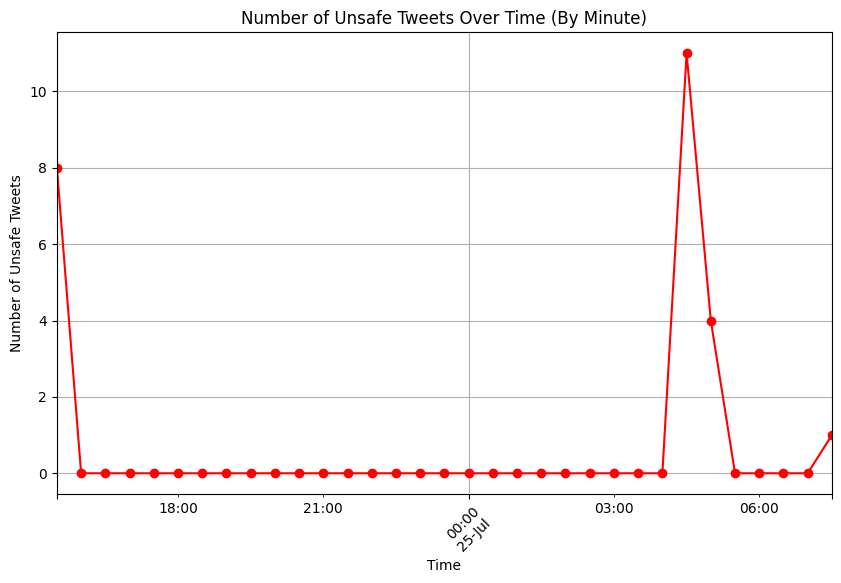

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Simulate fetching all tweets data
tweets_data = fetch_all_tweets()
print("Fetched tweets data: ", tweets_data)

if tweets_data:
    # Convert to DataFrame
    df = pd.DataFrame(tweets_data)
    # Convert 'created_at' to datetime
    df['created_at'] = pd.to_datetime(df['created_at'])

    # Filter unsafe tweets (those flagged by CNN or admin)
    unsafe_tweets = df[(df['cnn_result'] == 1) | (df['admin_result'] == 1)]

    if not unsafe_tweets.empty:
        # Set 'created_at' as index for resampling
        unsafe_tweets.set_index('created_at', inplace=True)
        
        unsafe_tweets_over_time = unsafe_tweets.resample('30min').size()
        # print("Unsafe tweets over time (by 30-minute intervals):\n", unsafe_tweets_over_time)

        # Plot the number of unsafe tweets over time
        fig, ax = plt.subplots(figsize=(10, 6))  # Specify figure size
        unsafe_tweets_over_time.plot(ax=ax, color='red', marker='o')
        ax.set_title('Number of Unsafe Tweets Over Time (By Minute)')
        ax.set_xlabel('Time')
        ax.set_ylabel('Number of Unsafe Tweets')
        ax.grid(True)
        
        # Rotate x-axis labels for better readability
        plt.xticks(rotation=45)
        ax.plot(unsafe_tweets_over_time.index, unsafe_tweets_over_time.values, marker='o', linestyle='-')

        # Display plot
        plt.show()
    else:
        print("No unsafe tweets available for plotting.")
else:
    print("No tweet data available.")


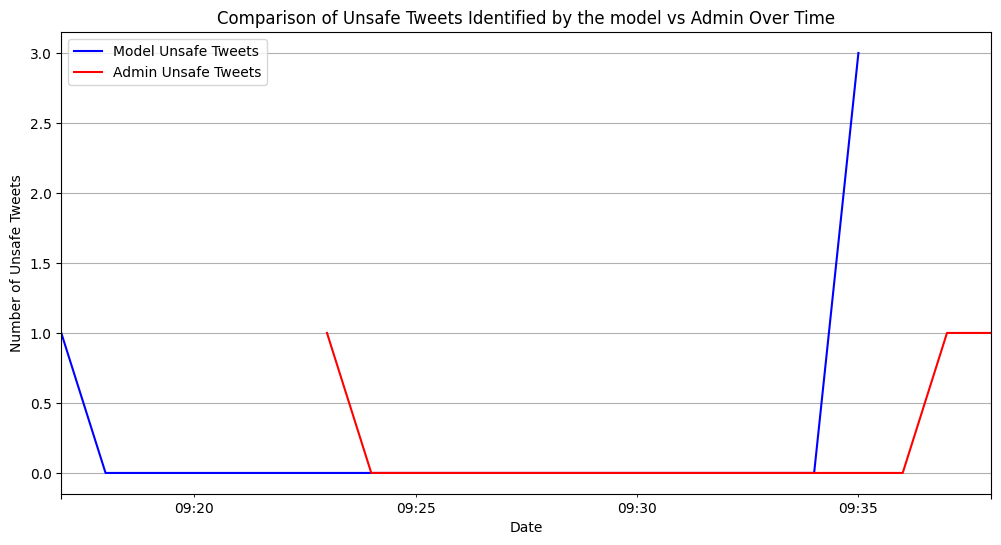

In [83]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
from datetime import datetime

base_url = "http://localhost:8000"

# Function to get all safety status changes from the endpoint
def get_safety_status_changes():
    response = requests.get(f'{base_url}/safety_status_changes')
    response.raise_for_status()  # Raise an error if the request failed
    return response.json()

# Fetch all safety status changes
all_changes = get_safety_status_changes()

if all_changes:
    # Convert the response to DataFrame
    df = pd.DataFrame(all_changes)

    # Ensure 'changed_at' is in datetime format
    df['changed_at'] = pd.to_datetime(df['changed_at'])

    # Filter changes by source
    cnn_changes = df[df['change_source'] == 'cnn']
    admin_changes = df[df['change_source'] == 'admin']

    # Resample and plot
    resample_period = '1min'  # Can be adjusted to '1h', '15min', etc.

    if not cnn_changes.empty:
        cnn_unsafe_changes = cnn_changes.resample(resample_period, on='changed_at').size()
    else:
        cnn_unsafe_changes = pd.Series(dtype=int)
    
    if not admin_changes.empty:
        admin_unsafe_changes = admin_changes.resample(resample_period, on='changed_at').size()
    else:
        admin_unsafe_changes = pd.Series(dtype=int)

    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 6))  # Adjust figure size if needed
    if not cnn_unsafe_changes.empty:
        cnn_unsafe_changes.plot(ax=ax, label='Model Unsafe Tweets', color='blue')
    if not admin_unsafe_changes.empty:
        admin_unsafe_changes.plot(ax=ax, label='Admin Unsafe Tweets', color='red')

    ax.set_xlabel('Date')
    ax.set_ylabel('Number of Unsafe Tweets')
    ax.set_title('Comparison of Unsafe Tweets Identified by the model vs Admin Over Time')
    ax.legend()
    ax.grid(True)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Display plot
    plt.show()
else:
    print("No safety status changes data available.")


In [14]:
cnn_changes

,id,change_source,changed_at,new_safety_status,tweet_id
0,1,cnn,2024-07-24 15:37:48.661784,1,939cb3c2
1,2,cnn,2024-07-24 15:38:12.288705,1,b20a310b


Fetched tweets data:  [{'tweet_id': 'bc3f6415', 'retweet_id': None, 'tweet': 'here is the thing when i occasionally see my ex who constitute now a man and is not even attractive my penis is instantly rock solid and i could literally go for hours if i want to societies what the fuck is happening to me i am able to get pavlovian style boners for my transsexual ex but so pretty much none otherwise non even when looking at movie of other women', 'user': 'user4', 'likes': 0, 'retweets': 0, 'logreg_prob': 0.9426726348427348, 'logreg_result': 1, 'cnn_prob': 0.919892430305481, 'cnn_result': 1, 'admin_result': None, 'created_at': '2024-07-25T08:50:24.859373'}, {'tweet_id': '750bd826', 'retweet_id': None, 'tweet': 'and she still is my wife and then i will treat her however long i want to', 'user': 'user5', 'likes': 0, 'retweets': 0, 'logreg_prob': 0.6398188868252725, 'logreg_result': 1, 'cnn_prob': 0.7360249161720276, 'cnn_result': 1, 'admin_result': None, 'created_at': '2024-07-25T08:50:41.9128

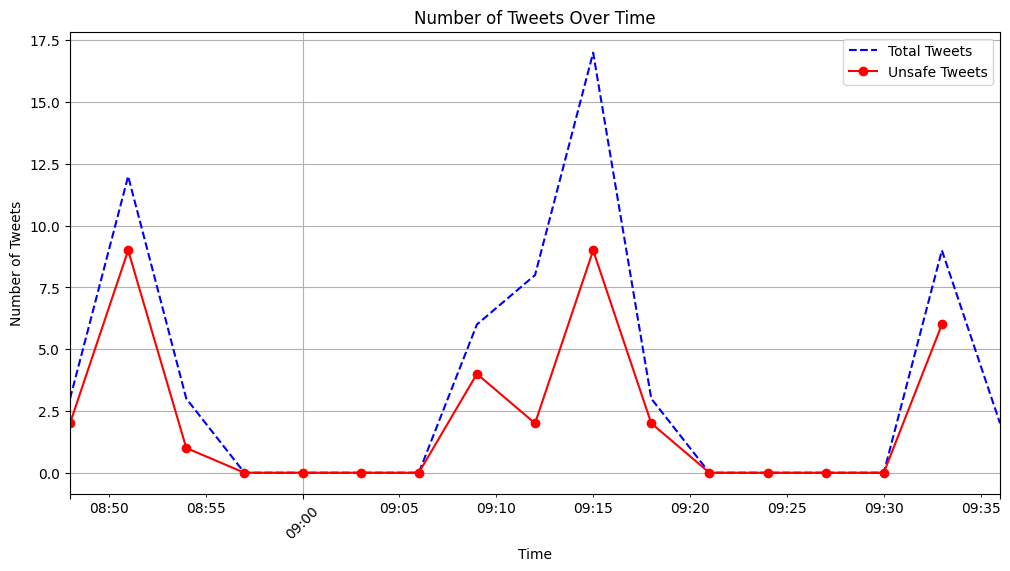

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

tweets_data = fetch_all_tweets()
print("Fetched tweets data: ", tweets_data)

if tweets_data:
    # Convert to DataFrame
    df = pd.DataFrame(tweets_data)
    # Convert 'created_at' to datetime
    df['created_at'] = pd.to_datetime(df['created_at'])

    # Filter unsafe tweets (those flagged by CNN or admin)
    unsafe_tweets = df[(df['cnn_result'] == 1) | (df['admin_result'] == 1)]

    if not df.empty:
        # Set 'created_at' as index for resampling
        df.set_index('created_at', inplace=True)
        unsafe_tweets.set_index('created_at', inplace=True)

        # Determine the time span of the data
        time_span = df.index.max() - df.index.min()
        print("Time span: ", time_span)
        # Set dynamic resampling frequency
        if time_span <= pd.Timedelta(hours=1):
            resample_freq = '3min'
        elif time_span <= pd.Timedelta(hours=3):
            resample_freq = '30min'
        else:
            resample_freq = '1H'

        # Resample data
        total_tweets_over_time = df.resample(resample_freq).size()
        unsafe_tweets_over_time = unsafe_tweets.resample(resample_freq).size()

        # Plot the number of total and unsafe tweets over time
        fig, ax = plt.subplots(figsize=(12, 6))  # Specify figure size
        total_tweets_over_time.plot(ax=ax, label='Total Tweets', color='blue', linestyle='--')
        unsafe_tweets_over_time.plot(ax=ax, label='Unsafe Tweets', color='red', marker='o', linestyle='-')

        ax.set_title('Number of Tweets Over Time')
        ax.set_xlabel('Time')
        ax.set_ylabel('Number of Tweets')
        ax.legend()
        ax.grid(True)

        # Rotate x-axis labels for better readability
        plt.xticks(rotation=45)

        # Display plot
        plt.show()
    else:
        print("No tweets available for plotting.")
else:
    print("No tweet data available.")

In [ ]:
import requests

base_url = "http://localhost:8000"

def delete_oldest_tweets():
    response = requests.delete(f'{base_url}/delete_oldest_tweets')
    if response.status_code == 200:
        print("Successfully deleted the oldest tweets.")
    else:
        print(f"Failed to delete tweets. Status code: {response.status_code}, Detail: {response.json().get('detail')}")


## graph of user performance

fetch data and create dataframes

In [97]:
import pandas as pd
import matplotlib.pyplot as plt


# Fetch and process data
tweets_data = fetch_all_tweets()
print("Fetched tweets data: ", tweets_data)

if tweets_data:
    # Convert to DataFrame
    df = pd.DataFrame(tweets_data)
    # Convert 'created_at' to datetime
    df['created_at'] = pd.to_datetime(df['created_at'])

    # Filter hate speech tweets
    blocked_realtime = df[df['logreg_result'] == 1]
    blocked_by_model = df[df['cnn_result'] == 1]
    blocked_by_admin = df[df['admin_result'] == 1]

    # Group by user and count tweets
    blocked_realtime_counts = blocked_realtime.groupby('user').size().sort_values(ascending=False)
    blocked_by_model_counts = blocked_by_model.groupby('user').size().sort_values(ascending=False)
    blocked_by_admin_counts = blocked_by_admin.groupby('user').size().sort_values(ascending=False)
    
    # Get top users
    top_users = list(set(blocked_realtime_counts.index) |
                     set(blocked_by_model_counts.index) |
                     set(blocked_by_admin_counts.index))

    # Create a DataFrame for the top users
    top_users_df = pd.DataFrame({
        'user': top_users
    }).set_index('user')

    # Add counts to the DataFrame
    top_users_df['Blocked in Real-time'] = top_users_df.index.map(blocked_realtime_counts).fillna(0)
    top_users_df['Blocked by Model'] = top_users_df.index.map(blocked_by_model_counts).fillna(0)
    top_users_df['Blocked by Admin'] = top_users_df.index.map(blocked_by_admin_counts).fillna(0)

    # Calculate total counts
    top_users_df['Total'] = top_users_df.sum(axis=1)
    
    # Sort by total counts
    top_users_df = top_users_df.sort_values(by='Total', ascending=False)
    
    # Drop the 'Total' column as we don't need it in the graph
    top_users_df.drop(columns=['Total'], inplace=True)

    # Print counts for debugging
    print("Top Users DataFrame:\n", top_users_df)

Fetched tweets data:  [{'tweet_id': 'bc3f6415', 'retweet_id': None, 'tweet': 'here is the thing when i occasionally see my ex who constitute now a man and is not even attractive my penis is instantly rock solid and i could literally go for hours if i want to societies what the fuck is happening to me i am able to get pavlovian style boners for my transsexual ex but so pretty much none otherwise non even when looking at movie of other women', 'user': 'user4', 'likes': 0, 'retweets': 0, 'logreg_prob': 0.9426726348427348, 'logreg_result': 1, 'cnn_prob': 0.919892430305481, 'cnn_result': 1, 'admin_result': None, 'created_at': '2024-07-25T08:50:24.859373'}, {'tweet_id': '750bd826', 'retweet_id': None, 'tweet': 'and she still is my wife and then i will treat her however long i want to', 'user': 'user5', 'likes': 0, 'retweets': 0, 'logreg_prob': 0.6398188868252725, 'logreg_result': 1, 'cnn_prob': 0.7360249161720276, 'cnn_result': 1, 'admin_result': None, 'created_at': '2024-07-25T08:50:41.9128

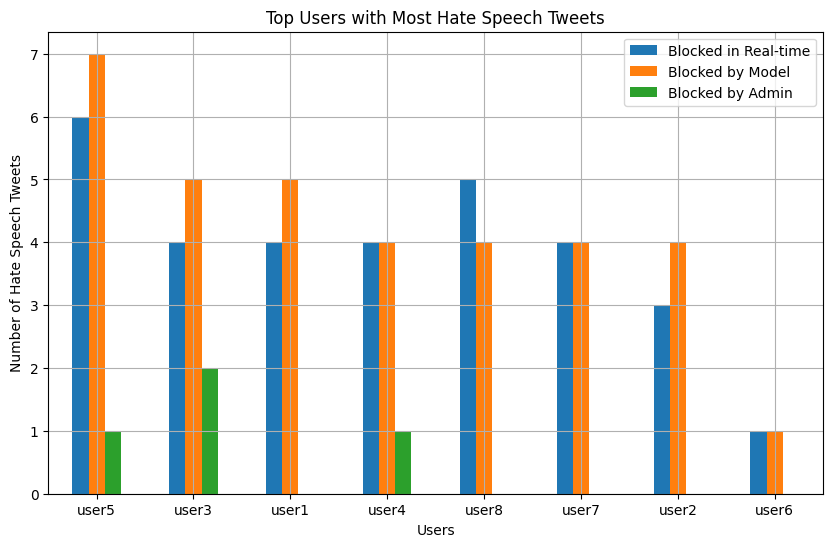

In [99]:
# Plot grouped bar chart for top users
def plot_grouped_bar_chart(df, title):
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot bars
    df.plot(kind='bar', ax=ax)
    
    # Set titles and labels
    ax.set_title(title)
    ax.set_xlabel('Users')
    ax.set_ylabel('Number of Hate Speech Tweets')
    ax.grid(True)
    plt.xticks(rotation=0)
    
    # Display plot
    plt.show()

# Plot for top users blocked in various categories
plot_grouped_bar_chart(top_users_df, 'Top Users with Most Hate Speech Tweets')


## user liking tweet

In [111]:
import requests

base_url = "http://localhost:8000"

def like_tweet(tweet_id, user_id):
    like_data = {
        "user_id": user_id,
    }
    response = requests.post(f"{base_url}/like_tweet/{tweet_id}", json=like_data)
    if response.status_code == 200:
        print(f"Tweet {tweet_id} liked by user {user_id}.")
    else:
        print(f"Failed to like tweet {tweet_id}. Error: {response.json()}")

# Example usage
tweet_id = "7ab4179f"
user_id = "user1"
like_tweet(tweet_id, user_id)

Tweet 7ab4179f liked by user user1.


In [107]:
# Function to fetch all stored tweets for user view
def fetch_user_view_tweets():
    url = f"{base_url}/display_tweets"
    response = requests.get(url)
    
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to fetch tweets: {response.status_code}")
        print(f"Response: {response.json()}")
        return None

In [123]:

def retweet_tweet(tweet_id, user_id, text):
    # Define the endpoint URL for retweeting
    retweet_url = f"{base_url}/retweet/{tweet_id}"

    # Prepare the request data
    retweet_data = {
        "user_id": user_id,
        "text": text
    }

    # Send the request to the retweet endpoint
    response = requests.post(retweet_url, json=retweet_data)

    # Check if the request was successful
    if response.status_code == 200:
        print(f"Tweet {tweet_id} retweeted successfully.")
        result = response.json()
        new_tweet_id = result.get("new_tweet_id")
        print(f"New tweet ID: {new_tweet_id}")
    else:
        print(f"Failed to retweet tweet {tweet_id}. Error: {response.json()}")

# Example usage
tweet_id = "7ab4179f"
user_id = "user1"
text = "This is a retweet example."

retweet_tweet(tweet_id, user_id, text)

Tweet 7ab4179f retweeted successfully.
New tweet ID: 99397dab1e14cb9947b67425ac09d2be18680b08c8e8586ac25f54be20566914


In [124]:
user_view_tweets = fetch_user_view_tweets()

In [125]:
user_view_tweets

[{'user_id': 'user3',
  'id': 1,
  'likes': 1,
  'safety_status': 1,
  'tweet_id': '7ab4179f',
  'retweet_id': None,
  'text': 'the money',
  'retweets': 5,
  'created_at': '2024-07-25T08:50:43.998954'},
 {'user_id': 'user3',
  'id': 2,
  'likes': 0,
  'safety_status': 1,
  'tweet_id': '81de6805',
  'retweet_id': None,
  'text': 'the main movement is...',
  'retweets': 0,
  'created_at': '2024-07-25T08:52:48.634960'},
 {'user_id': 'user7',
  'id': 3,
  'likes': 0,
  'safety_status': None,
  'tweet_id': '2e0e1ca6',
  'retweet_id': None,
  'text': 'renewed revert wars hey byway welcome back but when i said to return after waiting out your block i did not mean for you to return and re start the revert warring exactly where you left it let me make it clear that this will still be seen as disruption and i very strongly advise you not to even approach by wide margin this time admins can block for disruption in repeat cases even without being touched technically',
  'retweets': 0,
  'created_

## admin to block user interaction

In [137]:
# Function to block a user
from fastapi import params


# Function to block a user
def block_user(user_id):
    url = f"{base_url}/block_user/{user_id}"
    try:
        response = requests.post(url)
        response.raise_for_status()  # Check for HTTP errors
        print(f"User {user_id} has been blocked.")
    except requests.RequestException as e:
        print(f"Failed to block user {user_id}. Error: {e}")

In [138]:

# Example usage
block_user("user3")

User user3 has been blocked.


In [140]:

# Example usage
tweet_id = "7ab4179f"
user_id = "user1"
like_tweet(tweet_id, user_id)

Tweet 7ab4179f liked by user user1.


In [141]:
# Example usage
tweet_id = "7ab4179f"
user_id = "user1"
text = "This is a retweet example."

retweet_tweet(tweet_id, user_id, text)

Tweet 7ab4179f retweeted successfully.
New tweet ID: 089fb8c9238e06739163a11871f32def90ee219a6f1f9cc294307ebce79bb4b5


In [142]:
# Example usage
tweet_id = "7ab4179f"
user_id = "user3"
text = "This is a retweet example."

retweet_tweet(tweet_id, user_id, text)

Failed to retweet tweet 7ab4179f. Error: {'detail': 'User is blocked and cannot retweet'}


## user update and delete tweet

In [144]:
import requests
from datetime import datetime

base_url = "http://localhost:8000"  # Adjust this if your API is running on a different port or URL

def post_tweet_for_prediction(tweet: str, user: str):
    response = requests.post(f'{base_url}/predict', json={"text": tweet, "user": user})
    return response.json()

def store_posted_tweet(tweet_id: str, retweet_id, user_id: str, text: str, likes: int, retweets: int, safety_status, created_at: str):
    data = {
        "tweet_id": tweet_id,
        "retweet_id": retweet_id,
        "user_id": user_id,
        "text": text,
        "likes": likes,
        "retweets": retweets,
        "safety_status": safety_status,
        "created_at": created_at
    }
    try:
        response = requests.post(f'{base_url}/store_tweet', json=data)
        response.raise_for_status()
        return response.json()
    except requests.exceptions.RequestException as e:
        print(f"Error storing posted tweet: {e}")
        return {"error": str(e)}

def update_tweet(tweet_id: str, new_text: str, user: str):
    response = requests.put(f'{base_url}/update_tweet/{tweet_id}', json={"new_text": new_text, "user": user})
    return response.json()

def delete_tweet(tweet_id: str):
    response = requests.delete(f'{base_url}/delete_tweet/{tweet_id}')
    return response.status_code

def fetch_tweet_by_id(tweet_id: str):
    response = requests.get(f'{base_url}/fetch_tweet_by_id/{tweet_id}')
    return response.json()


In [149]:
import requests
from datetime import datetime, timezone
from typing import Optional  # Import Optional for type hints

base_url = "http://localhost:8000"  # Update if your API runs on a different URL

def post_tweet_for_prediction(tweet: str, user: str):
    response = requests.post(f'{base_url}/predict', json={"text": tweet, "user": user})
    return response.json()

def store_posted_tweet(tweet_id: str, retweet_id: Optional[str], user_id: str, text: str, likes: int, retweets: int, safety_status: Optional[int], created_at: str):
    data = {
        "tweet_id": tweet_id,
        "retweet_id": retweet_id,
        "user_id": user_id,
        "text": text,
        "likes": likes,
        "retweets": retweets,
        "safety_status": safety_status,
        "created_at": created_at
    }
    try:
        response = requests.post(f'{base_url}/store_tweet', json=data)
        response.raise_for_status()
        return response.json()
    except requests.exceptions.RequestException as e:
        print(f"Error storing posted tweet: {e}")
        return {"error": str(e)}

def update_tweet(tweet_id: str, new_text: str, user: str):
    # Update function now includes JSON body with required fields
    response = requests.put(
        f'{base_url}/update_tweet/{tweet_id}',
        json={"new_text": new_text, "user": user}
    )
    return response.json()

def delete_tweet(tweet_id: str):
    response = requests.delete(f'{base_url}/delete_tweet/{tweet_id}')
    return response.status_code

def fetch_tweet_by_id(tweet_id: str):
    response = requests.get(f'{base_url}/fetch_tweet/{tweet_id}')
    return response.json()

def simulate_tweet_operations():
    # 1. Post a new tweet for prediction
    tweet_text = "This is a test tweet."
    user = "test_user"
    prediction = post_tweet_for_prediction(tweet_text, user)
    
    if prediction.get("logreg_result") != 1:
        created_at = datetime.now(timezone.utc).isoformat()
        
        # 2. Store the tweet
        store_response = store_posted_tweet(
            tweet_id=prediction["tweet_id"],
            retweet_id=None,
            user_id=user,
            text=tweet_text,
            likes=0,
            retweets=0,
            safety_status=None,
            created_at=created_at
        )
        
        print("Tweet stored:", store_response)
        
        # 3. Fetch and print the tweet before update
        tweet_id = prediction["tweet_id"]
        print("Tweet before update:", fetch_tweet_by_id(tweet_id))
        
        # 4. Update the tweet
        new_text = "This is the updated test tweet."
        update_response = update_tweet(tweet_id, new_text, user)
        
        print("Update response:", update_response)
        
        # 5. Fetch and print the tweet after update
        print("Tweet after update:", fetch_tweet_by_id(tweet_id))
        
        # 6. Delete the tweet
        delete_status = delete_tweet(tweet_id)
        if delete_status == 200:
            print(f"Tweet {tweet_id} deleted successfully")
        else:
            print(f"Failed to delete tweet {tweet_id}, status code: {delete_status}")
        
        # 7. Attempt to fetch the deleted tweet
        print("Fetching deleted tweet:", fetch_tweet_by_id(tweet_id))
    else:
        print("Tweet was flagged by logistic regression and was not stored")

# Run the simulation
simulate_tweet_operations()


Tweet stored: {'retweet_id': None, 'text': 'This is a test tweet.', 'tweet_id': '91a0cff11b77d403ad0be4fee4cd7724ba3838abe2028533c9ea5a1d6ed47498', 'retweets': 0, 'created_at': '2024-07-25T18:16:08.483766', 'user_id': 'test_user', 'id': 39, 'likes': 0, 'safety_status': None}
Tweet before update: {'tweet_id': '91a0cff11b77d403ad0be4fee4cd7724ba3838abe2028533c9ea5a1d6ed47498', 'retweet_id': None, 'tweet': 'This is a test tweet.', 'user': 'test_user', 'likes': 0, 'retweets': 0, 'logreg_prob': 0.18795598480268685, 'logreg_result': 0, 'cnn_prob': None, 'cnn_result': None, 'admin_result': None, 'created_at': '2024-07-25T18:16:08.483766'}
Update response: {'detail': [{'type': 'missing', 'loc': ['query', 'new_text'], 'msg': 'Field required', 'input': None}, {'type': 'missing', 'loc': ['query', 'user'], 'msg': 'Field required', 'input': None}]}
Tweet after update: {'tweet_id': '91a0cff11b77d403ad0be4fee4cd7724ba3838abe2028533c9ea5a1d6ed47498', 'retweet_id': None, 'tweet': 'This is a test tweet.

In [151]:
import requests

def update_tweet(tweet_id: str, new_text: str, user: str):
    response = requests.put(
        f'{base_url}/update_tweet/{tweet_id}',
        json={"new_text": new_text, "user": user}  # JSON body
    )
    return response.json()

# Example data for update
tweet_id = "91a0cff11b77d403ad0be4fee4cd7724ba3838abe2028533c9ea5a1d6ed47498"
new_text = "This is the updated tweet text."
user = "test_user"

# Call the update function
update_response = update_tweet(tweet_id, new_text, user)
print("Update Response:", update_response)


Update Response: {'detail': 'Tweet not found in stored tweets'}


In [18]:
tweets = fetch_all_tweets()

In [26]:
import pandas as pd

def process_safety_status_data(tweets):
    data = {
        'Logistic Regression': 0,
        'CNN': 0,
        'Admin': 0
    }

    for tweet in tweets:
        if tweet['logreg_result'] == 1:
            data['Logistic Regression'] += 1
        if tweet['cnn_result'] == 1:
            data['CNN'] += 1
        if tweet['admin_result'] == 1:
            data['Admin'] += 1

    return data


In [27]:
tweets

[{'tweet_id': '0a16bf59c8b68a488c9d3a950f84fb807c9d18fad89d22ba5d1c76e36f482a3e',
  'retweet_id': None,
  'tweet': 'i wish fucking towel heads never came to our country in the first place',
  'user': 'user5',
  'likes': 0,
  'retweets': 0,
  'logreg_prob': 0.9446891508111326,
  'logreg_result': 1,
  'cnn_prob': 0.9569458961486816,
  'cnn_result': 1,
  'admin_result': None,
  'created_at': '2024-07-25T18:35:30.508421'},
 {'tweet_id': '78657f33cbaf967ccd9c2ac01a246815eb2b03df9c5bccfdf31aded91415e23c',
  'retweet_id': None,
  'tweet': 'i look forward to the happy things chat and just to lead up to it here is a smiling crater you need to look at the large image to see it',
  'user': 'user3',
  'likes': 2,
  'retweets': 4,
  'logreg_prob': 0.030545622771433276,
  'logreg_result': 0,
  'cnn_prob': 0.04232430085539818,
  'cnn_result': 0,
  'admin_result': 0,
  'created_at': '2024-07-25T18:35:41.609806'},
 {'tweet_id': '6e693849939bd86cfabdef78104d7dd2987e0b2576ee27415667ea84d91a38c9',
  'retw

In [28]:
import matplotlib.pyplot as plt

def create_donut_chart(data):
    labels = list(data.keys())
    sizes = list(data.values())
    colors = ['#ff9999','#66b3ff','#99ff99']
    
    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, colors=colors, startangle=90, counterclock=False, wedgeprops=dict(width=0.3))

    # Draw circle for donut shape
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig.gca().add_artist(centre_circle)
    
    plt.title('Safety Status by Source')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()


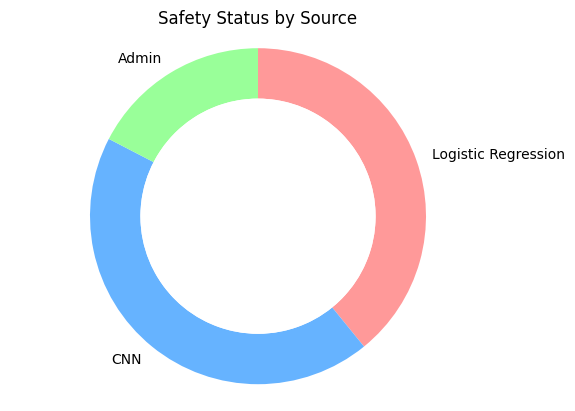

In [29]:
def main():
    # Fetch all tweets
    tweets = fetch_all_tweets()

    # Process data
    safety_status_data = process_safety_status_data(tweets)

    # Create donut chart
    create_donut_chart(safety_status_data)

if __name__ == "__main__":
    main()


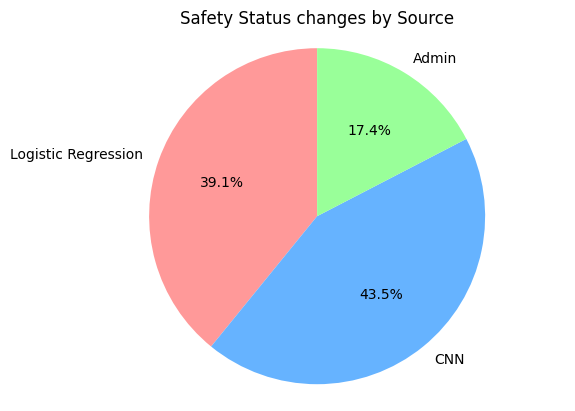

In [35]:
import matplotlib.pyplot as plt

def process_safety_status_data(tweets):
    data = {
        'Logistic Regression': 0,
        'CNN': 0,
        'Admin': 0
    }

    for tweet in tweets:
        if tweet['logreg_result'] == 1:
            data['Logistic Regression'] += 1
        if tweet['cnn_result'] == 1:
            data['CNN'] += 1
        if tweet['admin_result'] == 1:
            data['Admin'] += 1

    return data

def create_pie_chart_with_percentages(data):
    labels = list(data.keys())
    sizes = list(data.values())
    colors = ['#ff9999', '#66b3ff', '#99ff99']
    
    fig, ax = plt.subplots()
    wedges, texts, autotexts = ax.pie(
        sizes, 
        labels=labels, 
        colors=colors, 
        startangle=90, 
        autopct='%1.1f%%'  # Displays percentages
    )
    
    plt.title('Safety Status changes by Source')
    # plt.text('Marks who caught the hate speech')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # Adjust font size for percentage text
    for text in autotexts:
        text.set_fontsize(10)
    
    plt.show()

def main():
    # Fetch all tweets
    tweets = fetch_all_tweets()

    # Process data
    safety_status_data = process_safety_status_data(tweets)

    # Create pie chart with percentages
    create_pie_chart_with_percentages(safety_status_data)

if __name__ == "__main__":
    main()
